# Text Analysis ( NLP)

Collection of Text messages along with label as spam or not spam. Create a machine learning model to detect spam messages.

In [1]:
# loading basic libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings;warnings.filterwarnings('ignore');

In [2]:
# Reading Data
data = pd.read_csv("D:\Ravi_Data\spam.csv", encoding = 'latin-1')
# subsetting data for only required column
data = data[['label','text']]
print(data.info())
data.head()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


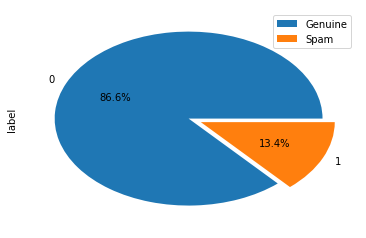

In [3]:
data['label'] = data['label'].apply(lambda x: 1 if x == "spam" else 0)

data["label"].value_counts().plot(kind = 'pie',autopct = '%1.1f%%',explode = [0, 0.1])
plt.legend(["Genuine", "Spam"])
plt.show()

In [4]:
# Creating token using word tokonizer 
# To proceed with data cleaning process
from nltk.tokenize import word_tokenize

data['text'] = data['text'].apply(lambda x: word_tokenize(x))
print(data[['text']].head()) # created list of list

                                                text
0  [Go, until, jurong, point, ,, crazy.., Availab...
1           [Ok, lar, ..., Joking, wif, u, oni, ...]
2  [Free, entry, in, 2, a, wkly, comp, to, win, F...
3  [U, dun, say, so, early, hor, ..., U, c, alrea...
4  [Nah, I, do, n't, think, he, goes, to, usf, ,,...


In [5]:
# Created function for doing 3 cleaning processes in one go
## 1. Removing all tokens which are not alphabetic
## 2. converting all tokens into lower case
## 3. lemmaterize all tokens
from nltk.stem import WordNetLemmatizer

def lower_alpha_lemm(x):
    text = []
    for k in x:
        WordNetLemmatizer().lemmatize(k)
        if k.isalpha():
            k.lower()
            text.append(k)
    return text

data['text'] = data['text'].apply(lower_alpha_lemm)

In [6]:
# remove all tokens that appear only once in all documents combined

from collections import defaultdict

frequency = defaultdict(int)
for text in data['text']:
    for token in text:
        frequency[token] += 1

data['text'] = [
    [token for token in text if frequency[token] > 1]
    for text in data['text']
]
data['text']

0       [Go, until, point, Available, only, in, bugis,...
1                                  [Ok, lar, wif, u, oni]
2       [Free, entry, in, a, wkly, comp, to, win, FA, ...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, do, think, he, goes, to, usf, he, liv...
                              ...                        
5567    [This, is, the, time, we, have, tried, contact...
5568            [Will, b, going, to, esplanade, fr, home]
5569           [was, in, mood, for, that, So, any, other]
5570    [The, guy, did, some, but, I, acted, like, i, ...
5571                     [Rofl, Its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [7]:
# converting sentences again from list so that we can utilize CountVectorizer and TfidfVectorizer
data['text'] = data['text'].apply(lambda x : ' '.join(x))
print(data[['text']].head())

                                                text
0  Go until point Available only in bugis n great...
1                                   Ok lar wif u oni
2  Free entry in a wkly comp to win FA Cup final ...
3        U dun say so early hor U c already then say
4  Nah I do think he goes to usf he lives around ...


In [8]:
# loading sciki learn libraries and spliting data into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.3,random_state = 111)

# CountVectorizer & Naive bayes Model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)

# Only Transform the X test data : count_test
count_test = count_vectorizer.transform(X_test)

In [10]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

In [11]:
# Evaluating Model
score = metrics.accuracy_score(y_test,pred)
print("Count Vectorizer Score :",score.round(2))
print("Count Vectorizer fbeta :",metrics.fbeta_score(y_test,pred, beta = 0.5).round(2))

Count Vectorizer Score : 0.98
Count Vectorizer fbeta : 0.93


# TFidfVectorizer & Naive Bayes Model

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

# Tfidf vectorizer fit and transform
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# only transform X test data set
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

In [14]:
# Model Evaluation
score = metrics.accuracy_score(y_test,pred)
print("Tfidf Vectorizer score :" , score.round(2))
print("Tfidf Vectorizer fbeta :", metrics.fbeta_score(y_test,pred, beta = 0.5).round(2))

Tfidf Vectorizer score : 0.98
Tfidf Vectorizer fbeta : 0.96
